In [1]:
import numpy as np
import os
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import axes3d
from  PIL import Image
from time import time
from torch import nn
from torchvision import models
from torchvision import transforms
from torchvision import datasets
from torch.utils.data.dataset import Dataset
from torchsummary import summary
import pylab
import random
import numpy 
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import preprocessing

torch.cuda.is_available()

True

In [2]:
resnet18 = models.resnet18(pretrained=True)

In [3]:
resnet34 = models.resnet34(pretrained=True)

In [4]:
resnet50 = models.resnet50(pretrained=True)

In [5]:
resnet101 = models.resnet101(pretrained=True)

In [6]:
resnet152 = models.resnet152(pretrained=True)

In [7]:
# choose the model.
resnet = resnet50

In [8]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], 
            std=[0.229, 0.224, 0.225]
        )])

In [9]:
def load_images_from_folder(folder, end, as_tensor = False):

    images = []
    files = folders = 0
    count= 0
    dirnames = [] 

    num_img = []

    for _, dirnames, filenames in os.walk(folder):

 

        if dirnames != []:
            subfolders = dirnames
        current_path = os.path.join(folder, subfolders[count])
        num_img.append(len(os.listdir(current_path)))
        for filename in os.listdir(current_path):
            img = Image.open(os.path.join(current_path, filename))
            if img is not None:
                if as_tensor:
                    img = torch.from_numpy(img * 1.0)
                    images.append(img)
                else: 
                    images.append(img)

 

        count += 1
        
        if count % 10 == 0:
            print('number of folder done =', count, 'total number of images so far =', len(images))
            
        if count  == end:
            return images, num_img

    return images, num_img


def show_image(PIL_img):
    PIL_img.show()

In [10]:
path = r'C:\Users\richa\Desktop\projects\Bristol uni porjects\Univecity projects\Applied Data Science\uob_image_set'

dataset, num_img_list = load_images_from_folder(path, 10)

number of folder done = 10 total number of images so far = 42


In [11]:
print(len(dataset)), print(num_img_list), print(sum(num_img_list))

42
[5, 4, 4, 5, 4, 3, 4, 4, 5, 4]
42


(None, None, None)

In [12]:
list_input_tensor = []
list_input_batch = []
num_img = sum(num_img_list)
for item in range(num_img):
    input_tensor = preprocess(dataset[item])
    input_batch = input_tensor.unsqueeze(0)
    list_input_tensor.append(input_tensor)
    list_input_batch.append(input_batch)
    

In [13]:
for param in resnet.parameters():
    param.requires_grad = False
    
# Parameters of newly constructed modules have requires_grad=True by default
# num_ftrs = resnet.fc.in_features
# resnet.fc = torch.nn.Linear(num_ftrs, 3)


In [14]:
for i in range(len(list_input_batch)):
    if torch.cuda.is_available():
        input_batch = list_input_batch[i].to('cuda')
        resnet.to('cuda')
    
    else:
        input_batch = list_input_batch[i].to('cpu')
        resnet.to('cpu')
    
    with torch.no_grad():
        output = resnet(input_batch)
        print(output)

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

tensor([[-1.0256e+00, -3.0403e-01, -5.5952e-01, -1.1647e+00, -6.2579e-01,
         -3.0926e-01, -6.7466e-01,  4.8025e-01,  3.9154e-01, -3.8189e-01,
         -8.0184e-01, -7.8169e-01, -3.4631e-01, -8.8806e-01, -8.2981e-01,
         -3.8463e-01, -6.8447e-01, -8.9698e-02, -2.9515e-02, -4.3159e-01,
         -1.0756e+00, -7.5252e-01, -1.1432e+00, -3.7669e-02, -8.4619e-01,
         -6.8210e-01, -7.9098e-01, -5.9601e-01, -5.6631e-01, -5.9892e-01,
         -6.5345e-01, -8.1460e-01, -5.4614e-01, -3.1609e-01, -1.1274e-02,
         -4.4543e-01,  7.0796e-01, -3.9049e-01, -3.1194e-01,  2.1122e-01,
         -5.3861e-01, -5.5749e-01, -5.2857e-01, -2.8206e-01, -1.3017e-01,
         -7.6898e-02, -4.5162e-01, -5.5886e-01, -9.3107e-01, -4.9056e-01,
         -1.3579e-01,  3.4117e-01, -2.8478e-01, -2.5046e-01, -3.6759e-02,
         -7.9493e-01, -3.5709e-01, -8.1472e-01, -1.9249e-01, -1.5380e-02,
          7.9758e-01,  1.4652e-01,  4.3583e-02,  5.3217e-02, -5.3241e-01,
         -1.5399e-01, -2.6165e-01, -4.

In [15]:
output_array = []
for i in range(len(list_input_batch)):
    if torch.cuda.is_available():
        input_batch = list_input_batch[i].to('cuda')
        resnet.to('cuda')
    
    else:
        input_batch = list_input_batch[i].to('cpu')
        resnet.to('cpu')
        
    
    with torch.no_grad():
        output = resnet(input_batch)
        cup_tensor = output.cpu()
        
    output_array.append(cup_tensor[0].tolist())
#     output_array.append(np.asarray(cup_tensor[0]))
#     print(np.asarray(cup_tensor[0]))
output_array = np.asarray(output_array)
display(output_array)

array([[-1.02560365, -0.30403277, -0.55952156, ..., -0.38097632,
         1.17921698,  0.78250921],
       [-1.02560365, -0.30403277, -0.55952156, ..., -0.38097632,
         1.17921698,  0.78250921],
       [-1.02560365, -0.30403277, -0.55952156, ..., -0.38097632,
         1.17921698,  0.78250921],
       ...,
       [-1.02560365, -0.30403277, -0.55952156, ..., -0.38097632,
         1.17921698,  0.78250921],
       [-1.02560365, -0.30403277, -0.55952156, ..., -0.38097632,
         1.17921698,  0.78250921],
       [-1.02560365, -0.30403277, -0.55952156, ..., -0.38097632,
         1.17921698,  0.78250921]])

In [30]:

# fig = plt.figure()
# ax = plt.axes(projection="3d")

# img_counter = 0
# for n in num_img_list:
#     r = lambda: random.randint(0,255)
#     random_color = '#%02X%02X%02X' % (r(),r(),r())
#     ax.scatter(output_array[img_counter:img_counter + n,0], output_array[img_counter:img_counter + n,1], output_array[img_counter:img_counter + n,2],color=random_color,s=20)
#     img_counter += n
# plt.show()  

# ax.set_xlabel('X Axes')
# ax.set_ylabel('Y Axes')
# ax.set_zlabel('Frame Axes')

# plt.show()

In [18]:
# fig = plt.figure()
# img_counter = 0
# for n in num_img_list:
#     r = lambda: random.randint(0,255)
#     random_color = '#%02X%02X%02X' % (r(),r(),r())
#     plt.plot(output_array[img_counter:img_counter + n,0], output_array[img_counter:img_counter + n,1], 'o',color=random_color)
#     img_counter += n
# plt.show()            

In [19]:
# fig = plt.figure()
# img_counter = 0
# for n in num_img_list:
#     r = lambda: random.randint(0,255)
#     random_color = '#%02X%02X%02X' % (r(),r(),r())
#     plt.plot(output_array[img_counter:img_counter + n,0], output_array[img_counter:img_counter + n,2], 'o',color=random_color)
#     img_counter += n
# plt.show()            

In [20]:
# fig = plt.figure()
# img_counter = 0
# for n in num_img_list:
#     r = lambda: random.randint(0,255)
#     random_color = '#%02X%02X%02X' % (r(),r(),r())
#     plt.plot(output_array[img_counter:img_counter + n,1], output_array[img_counter:img_counter + n,2], 'o',color=random_color)
#     img_counter += n
# plt.show()            

In [21]:
scaled_data = preprocessing.scale(output_array)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [22]:
pca_data

array([[ 1.76126458e+00,  4.96232609e-01,  2.13166409e+01, ...,
        -4.24153397e+00, -2.50539542e+00,  4.49900533e-15],
       [-9.16984267e+00, -5.14617269e+00,  7.74164348e+00, ...,
         2.27265349e-01, -3.06470041e+00,  1.70349845e-15],
       [-9.88583259e+00, -6.77095722e+00,  1.83960084e+01, ...,
         6.17530396e+00, -3.31317821e+00,  8.27463098e-16],
       ...,
       [-1.83446722e+01, -7.09229171e+00,  4.26210058e+00, ...,
         8.55263831e-01, -2.78215518e+00, -1.28369537e-15],
       [-3.49291261e+01, -9.82097354e+00, -3.85020544e+00, ...,
         9.09646449e-03,  1.50012168e+00, -3.46146722e-14],
       [ 3.87436279e+01, -8.58568739e-01,  5.77386340e+00, ...,
        -2.82942886e+00, -7.37887097e-01,  9.15413578e-15]])

In [23]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

In [24]:
per_var

array([22. ,  8.6,  6.5,  4.6,  4.3,  4.2,  3.7,  2.8,  2.7,  2.5,  2.3,
        2.2,  2.1,  2. ,  1.9,  1.8,  1.7,  1.7,  1.5,  1.5,  1.4,  1.4,
        1.3,  1.2,  1.2,  1.2,  1. ,  1. ,  1. ,  0.9,  0.9,  0.9,  0.8,
        0.8,  0.7,  0.7,  0.6,  0.6,  0.6,  0.5,  0.5,  0. ])

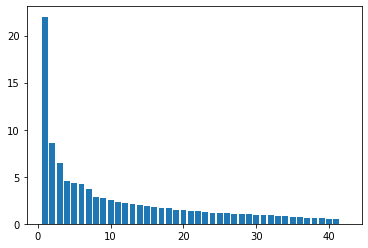

In [25]:
# plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
labels = ['PC' +  str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.show()

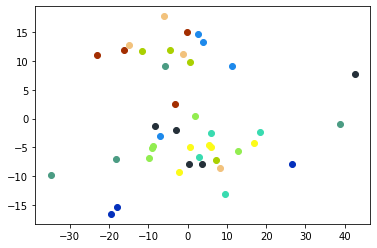

In [27]:
pca_df = pd.DataFrame(pca_data, columns=labels)

fig = plt.figure()
img_counter = 0
for n in num_img_list:
    r = lambda: random.randint(0,255)
    random_color = '#%02X%02X%02X' % (r(),r(),r())
    plt.plot(pca_df.PC1[img_counter:img_counter + n], pca_df.PC2[img_counter:img_counter + n], 'o',color=random_color)
    img_counter += n
plt.show()